<a href="https://colab.research.google.com/github/dipakexe/startup-loan/blob/main/notebooks/automated_loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Loan Application Analysis ⏳**

**INDEX**

- [DATA COLLECTION](#data-collection)
  - [DATA SOURCE](#data-source)
  - [METADATA](#metadata)
  - [DOWNLOAD DATA](#download-data)
- [DATA EXPLORATION](#data-exploration)
  - [MISSING VALUES](#missing-values)
  - [UNIQUE VALUES](#unique-values)
- [DATA CLEANING](#data-cleaning)
- [DATA PRE-PROCESSING](#data-pre-processing)
- [MODEL BUILDING](#model-building)
- [MODEL EVALUATION](#model-evaluation)
- [CONCLUSION](#conclusion)

#### **Problem Definition**

**It is a binary classification task**, so we have to classify whether a customer will repay or charge off the loan based on the historical records of the lender. The loan will be approved based on the historical data. Charge off means the declearation by the lender that the money is unlikely to be collected back. This generally happends when the customer don't pay for around 6 months.

#### **Model Building**

We will build a model for this binary classification task using classification algoruthms like logistic regression, decision trees and random forests.

#### **Model Evaluation**

We will evaluate out model using metrics such as accuracy, precision, recall, and F1 score to measure its performance on test dataset.

### IMPORT REQUIRED LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")

# FOR DATA MANIPULATION AND VISUALIZATION
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# PPREPROCESSING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# FOR MODEL BUILDING
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

# FOR MODEL EVALUATION
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<a name="data-collection"></a>
## **DATA COLLECTION**

<a name="data-source"></a>
### **DATA SOURCE**

The data is collected from kaggle's [Should This Loan be Approved or Denied? - A large and rich dataset from the U.S. Small Business Administration (SBA)](https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied) dataset.

<a name="metadata"></a>
### **METADATA - ABOUT THE DATASET**


| Field          | Type       | Description                                       |
| -------------- | ---------- | ------------------------------------------------- |
| LoanNr_ChkDgt  | Text       | Text Identifier – Primary key                      |
| Name           | Text       | Borrower name                                     |
| City           | Text       | Borrower city                                     |
| State          | Text       | Borrower state                                    |
| Zip            | Text       | Borrower zip code                                 |
| Bank           | Text       | Bank name                                         |
| BankState      | Text       | Bank state                                        |
| NAICS          | Text       | North American industry classification            |
|                |            | system code                                       |
| ApprovalDate   | Date/Time   | Date SBA commitment issued                        |
| ApprovalFY     | Text       | Fiscal year of commitment                         |
| Term           | Number     | Loan term in months                                |
| NoEmp          | Number     | Number of business employees                      |
| NewExist       | Text       | 1 D Existing business, 2 D New business           |
| CreateJob      | Number     | Number of jobs created                             |
| RetainedJob    | Number     | Number of jobs retained                            |
| FranchiseCode  | Text       | Franchise code, (00000 or 00001) D No franchise   |
| UrbanRural     | Text       | 1 D Urban, 2 D rural, 0 D undefined               |
| RevLineCr      | Text       | Revolving line of credit: Y D Yes, N D No         |
| LowDoc         | Text       | LowDoc Loan Program: Y D Yes, N D No              |
| ChgOffDate     | Date/Time   | The date when a loan is declared to be in default |
| DisbursementDate| Date/Time   | Disbursement date                                  |
| DisbursementGross | Currency | Amount disbursed                                  |
| BalanceGross   | Currency   | Gross amount outstanding                           |
| MIS_Status     | Text       | Loan status charged off D CHGOFF, Paid in full D PIF |
| ChgOffPrinGr   | Currency   | Charged-off amount                                |
| GrAppv         | Currency   | Gross amount of loan approved by bank              |
| SBA_Appv       | Currency   | SBA’s guaranteed amount of approved loan          |


Found this from the PDF file that comes with the dataset.

<a name="download-data"></a>
### DOWNLOAD DATA

DOWNLOADING THE DATASET FROM KAGGLE

In [4]:
import os
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
os.environ['KAGGLE_CONFIG_DIR'] = os.path.dirname('/content/drive/MyDrive/Colab Notebooks/kaggle.json')

!kaggle datasets download -d mirbektoktogaraev/should-this-loan-be-approved-or-denied

Mounted at /content/drive
 73% 34.0M/46.4M [00:00<00:00, 63.7MB/s]
100% 46.4M/46.4M [00:00<00:00, 69.7MB/s]
Mounted at /content/drive
should-this-loan-be-approved-or-denied.zip: Skipping, found more recently modified local copy (use --force to force download)


### EXTRACT DATA

In [5]:
!mkdir -p data/extracted_data/
!unzip -qn should-this-loan-be-approved-or-denied.zip -d data/extracted_data/

### LOAD DATA

In [86]:
df = pd.read_csv("/content/data/extracted_data/SBAnational.csv")

In [87]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [88]:
for col in df.columns:
    if(len(df[col].unique()) < 5):
        print(col, df[col].unique())


NewExist [ 2.  1.  0. nan]
UrbanRural [0 1 2]
MIS_Status ['P I F' 'CHGOFF' nan]


<a name="data-exploration"></a>
## **DATA EXPLORATION**

In [89]:
print(f"The dataset has {df.shape[0]} records and {df.shape[1]} attributes.")

The dataset has 899164 records and 27 attributes.


In [90]:
print(f"The dataset has {sum(df.duplicated())} duplicate records.")

The dataset has 0 duplicate records.


### RENAMING COLUMN NAMES FROM SHORT-HAND CAMEL CASE TO SELF-EXPLANATORY SNAKE CASE NAMES

In [91]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [92]:
new_column_names = {
    'LoanNr_ChkDgt': 'loan_number',
    'Name': 'borrower_name',
    'City': 'borrower_city',
    'State': 'borrower_state',
    'Zip': 'borrower_zip',
    'Bank': 'bank_name',
    'BankState': 'bank_state',
    'NAICS': 'industry_code',
    'ApprovalDate': 'approval_date',
    'ApprovalFY': 'fiscal_year',
    'Term': 'loan_term_months',
    'NoEmp': 'num_employees',
    'NewExist': 'business_type',
    'CreateJob': 'jobs_created',
    'RetainedJob': 'jobs_retained',
    'FranchiseCode': 'franchise_code',
    'UrbanRural': 'urban_rural',
    'RevLineCr': 'revolving_credit',
    'LowDoc': 'low_doc_program',
    'DisbursementDate': 'disbursement_date',
    'DisbursementGross': 'disbursement_amount',
    'BalanceGross': 'outstanding_amount',
    'MIS_Status': 'loan_status',
    'ChgOffPrinGr': 'charged_off_amount',
    'GrAppv': 'approved_amount',
    'SBA_Appv': 'sba_guaranteed_amount'
}

df.rename(columns=new_column_names, inplace=True)

In [93]:
df.columns

Index(['loan_number', 'borrower_name', 'borrower_city', 'borrower_state',
       'borrower_zip', 'bank_name', 'bank_state', 'industry_code',
       'approval_date', 'fiscal_year', 'loan_term_months', 'num_employees',
       'business_type', 'jobs_created', 'jobs_retained', 'franchise_code',
       'urban_rural', 'revolving_credit', 'low_doc_program', 'ChgOffDate',
       'disbursement_date', 'disbursement_amount', 'outstanding_amount',
       'loan_status', 'charged_off_amount', 'approved_amount',
       'sba_guaranteed_amount'],
      dtype='object')

<a name="missing-values"></a>
### **MISSING VALUES**

In [94]:
print(f"The dataset has {df.isna().sum().sum()} missing values.")

The dataset has 751259 missing values.


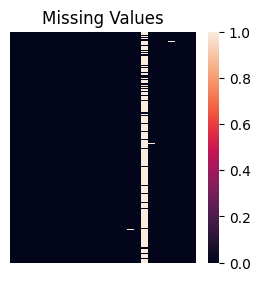

In [95]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111) # single axis

ax.set_title("Missing Values")
sns.heatmap(df.isna(), ax=ax)
plt.axis("off")
plt.show()

We will later deal with the missing values in the dataset. A column is almost missing as we can see in the heatmap. We have to completely drop the column.

<a name="unique-values"></a>
### **UNIQUE VALUES**

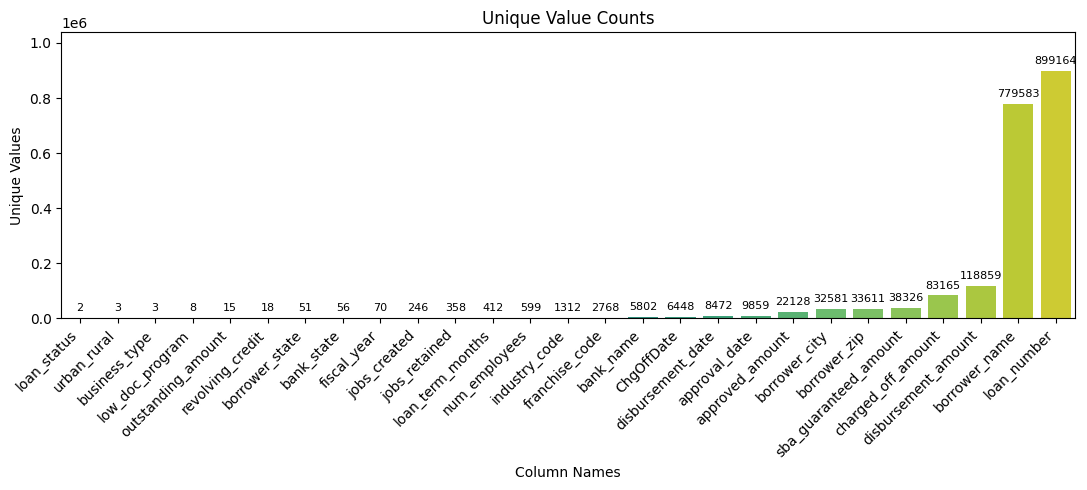

In [96]:
num_unique = df.nunique(dropna=True).sort_values(ascending=True)

plt.figure(figsize=(11, 5))
ax = sns.barplot(x=num_unique.index, y=num_unique.values, palette="viridis")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

for p in ax.patches:
    # patches are basically the bars in the bar plot.
    ax.annotate(
        round(p.get_height()), # height
        (p.get_x() + p.get_width() / 2., p.get_height()), # coordinate of the text
        ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points'
    )

plt.ylim(0, int(plt.ylim()[1] * 1.1))
plt.xlabel("Column Names")
plt.ylabel("Unique Values")
plt.title("Unique Value Counts")
plt.tight_layout()
plt.show()


Note that **`loan_status`** is the target column and it's the only binary variable by coincidence.

### TAREGT

- **`loan_status` is the target column.** This has two unique values:
  - PIF or Paid in Full means the loan is fully paid.
  - Charge-off means means the lender doesn't expect to fully collect the loan.
- All other columns can be treated as features.

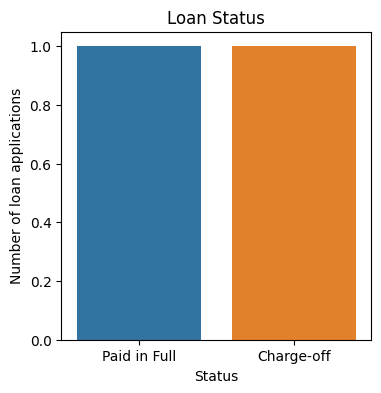

In [97]:
df['loan_status'] = df['loan_status'].str.replace("P I F", 'Paid in Full')
df['loan_status'] = df['loan_status'].str.replace("CHGOFF", 'Charge-off')

counts = df['loan_status'].value_counts()

plt.figure(figsize=(4, 4))
sns.countplot(counts, x=counts.index)
plt.xlabel("Status")
plt.ylabel("Number of loan applications")
plt.xticks([0, 1], ["Paid in Full", "Charge-off"])
plt.title("Loan Status")
plt.show()

### OTHER FEATURES

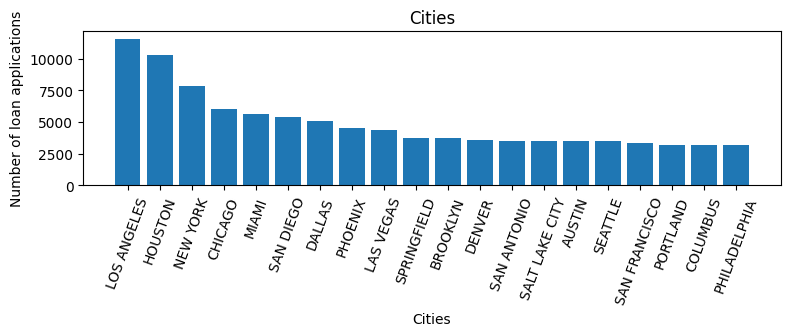

In [98]:
# TOP CITIES
counts = df['borrower_city'].value_counts().nlargest(20)

plt.figure(figsize=(9, 2))
plt.bar(height=counts, x=counts.index)
plt.xlabel("Cities")
plt.ylabel("Number of loan applications")
plt.title("Cities")

plt.xticks(rotation=70)
plt.show()

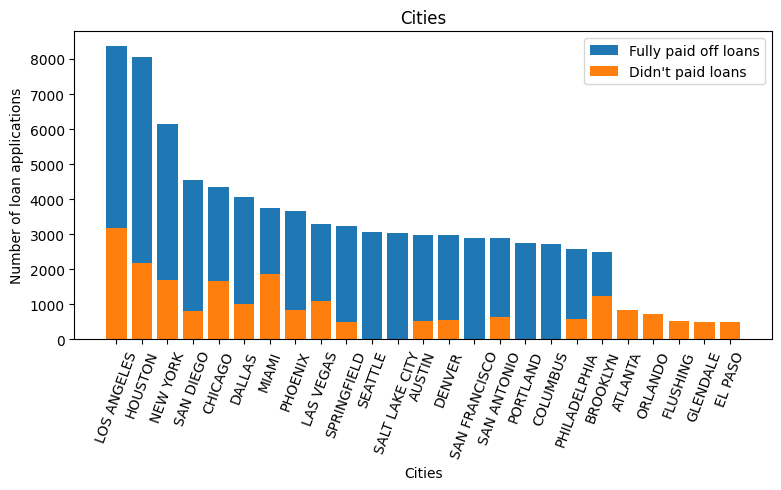

In [99]:
# TOP CITIES - Number of fully paid off loans v/s defaulters by city
num_cities = 20

plt.figure(figsize=(9, 4))

# Fully paid off loans
counts = df[df['loan_status'] == "Paid in Full"]['borrower_city'].value_counts().nlargest(num_cities)
plt.bar(height=counts, x=counts.index, label="Fully paid off loans")

# Didn't paid loans
counts = df[df['loan_status'] == "Charge-off"]['borrower_city'].value_counts().nlargest(num_cities)
plt.bar(height=counts, x=counts.index, label="Didn't paid loans")

plt.xticks(rotation=70)
plt.xlabel("Cities")
plt.ylabel("Number of loan applications")
plt.title("Cities")
plt.legend()
plt.show()

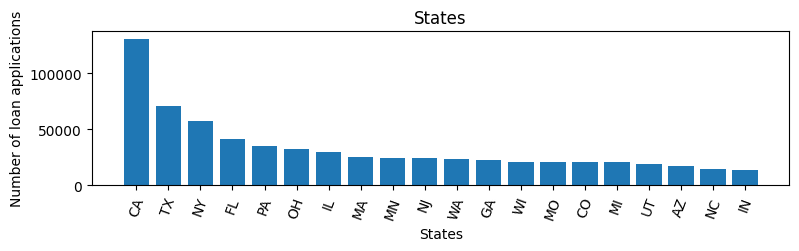

In [100]:
# TOP STATES
counts = df['borrower_state'].value_counts().nlargest(20)

plt.figure(figsize=(9, 2))
plt.bar(height=counts, x=counts.index)
plt.xlabel("States")
plt.ylabel("Number of loan applications")
plt.title("States")

plt.xticks(rotation=70)
plt.show()

<a name="data-cleaning"></a>
## **DATA CLEANING**

### DEALING WITH MISSING VALUES

In [101]:
df = df.dropna(axis=0)
df = df.drop(['ChgOffDate'], axis=1)

### DELETING UNNECESSARY COLUMNS

We will delete dates, IDs and names of customers.

In [102]:
# Loan IDs and names
df = df.drop(['loan_number', 'borrower_name', 'franchise_code'], axis=1)

# deleting dates
date_columns = ['approval_date', 'disbursement_date']
df = df.drop(date_columns, axis=1)

<a name="data-pre-processing"></a>
## **DATA PRE-PROCESSING**


### **FEATURE ENGINEERING**

### NUMERIC COLUMNS

In [103]:
numeric_columns = ['jobs_created', 'jobs_retained', 'num_employees', 'loan_term_months']

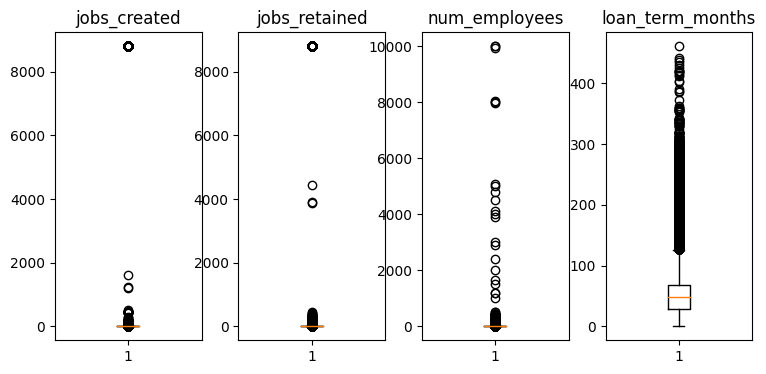

In [105]:
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.25)

for i, column in enumerate(numeric_columns):
    plt.subplot(1, 4 , i+1)
    plt.boxplot(x=df[column])
    plt.title(f'{column}')

plt.show()

In [106]:
for column in numeric_columns:
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    df = df[(df[column] >= Q1 - 1.5 * (Q3 - Q1)) & (df[column] <= Q3 + 1.5 * (Q3 - Q1))]

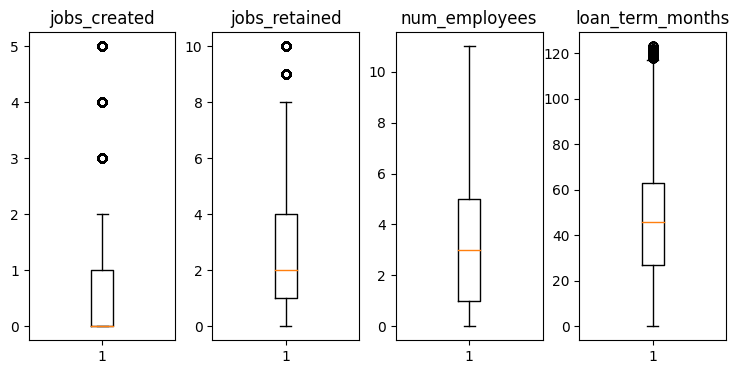

In [107]:
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.25)

for i, column in enumerate(numeric_columns):
    plt.subplot(1, 4 , i+1)
    plt.boxplot(x=df[column])
    plt.title(f'{column}')

plt.show()

#### **CURRENCY COLUMNS**

In [108]:
amount_features = ['disbursement_amount', 'charged_off_amount', 'approved_amount', 'sba_guaranteed_amount']
df[amount_features] = df[amount_features].replace(fr'[\$,]', '', regex=True).astype(float)

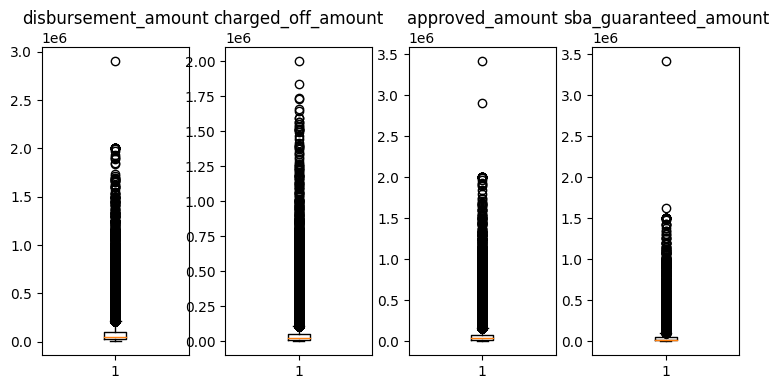

In [109]:
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.25)

for i, column in enumerate(amount_features):
    plt.subplot(1, 4 , i+1)
    plt.boxplot(df[column])
    plt.title(f'{column}')

plt.show()

In [110]:
for column in amount_features:
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    df = df[(df[column] >= Q1 - 1.5 * (Q3 - Q1)) & (df[column] <= Q3 + 1.5 * (Q3 - Q1))]

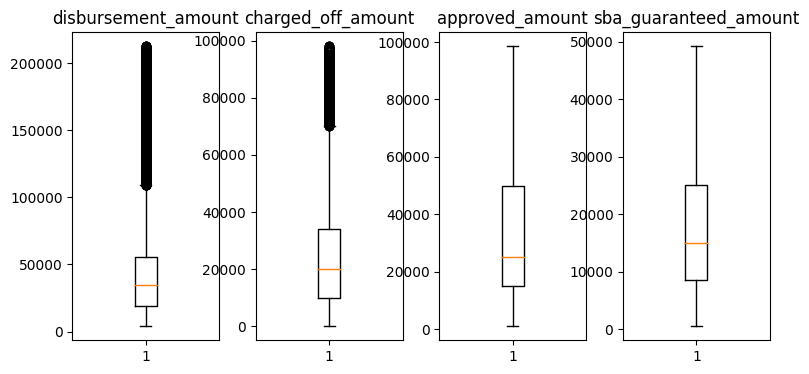

In [111]:
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.25)

for i, column in enumerate(amount_features):
    plt.subplot(1, 4 , i+1)
    plt.boxplot(df[[column]])
    plt.title(f'{column}')

plt.show()

### CATEGORICAL FEATURES

In [113]:
print(f"There are {df['business_type'].nunique()} unique bussiness types (existring/old or new) in the dataset.")
print(f"There are {df['urban_rural'].nunique()} unique location types (rural/urbun) types in the dataset.")

categorical_features = ['business_type', 'urban_rural']

There are 3 unique bussiness types (existring/old or new) in the dataset.
There are 3 unique location types (rural/urbun) types in the dataset.


### **ENCODING PIPELINE**

In [114]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaling_numbers', StandardScaler(), numeric_columns),
        ('scaling_amounts', StandardScaler(), amount_features),
        ('categorical_onehot_encoding', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

feature_names = numeric_columns + amount_features + categorical_features

In [135]:
feature_names

['jobs_created',
 'jobs_retained',
 'num_employees',
 'loan_term_months',
 'disbursement_amount',
 'charged_off_amount',
 'approved_amount',
 'sba_guaranteed_amount',
 'business_type',
 'urban_rural']

<a name="model-building"></a>
## **MODEL BUILDING**

In [116]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [117]:
X = X[feature_names]

In [118]:
X

,jobs_created,jobs_retained,num_employees,loan_term_months,disbursement_amount,charged_off_amount,approved_amount,sba_guaranteed_amount,business_type,urban_rural
60,0,0,10,7,25000.0,23484.0,25000.0,12500.0,1.0,0
64,0,0,7,37,20000.0,19653.0,20000.0,10000.0,1.0,0
67,1,5,4,26,60859.0,19994.0,20000.0,10000.0,2.0,2
83,3,4,1,5,28090.0,28090.0,28300.0,24055.0,2.0,1
103,0,0,6,84,10000.0,9161.0,10000.0,5000.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
898906,0,0,1,63,35000.0,21260.0,35000.0,28000.0,1.0,0
898946,0,0,2,1,45000.0,4357.0,45000.0,36000.0,1.0,0
898966,0,0,2,109,45000.0,30002.0,45000.0,36000.0,1.0,0
899011,0,0,2,42,53000.0,51746.0,53000.0,42400.0,2.0,0


In [119]:
y

60          Charge-off
64          Charge-off
67          Charge-off
83          Charge-off
103         Charge-off
              ...     
898906      Charge-off
898946      Charge-off
898966    Paid in Full
899011      Charge-off
899036      Charge-off
Name: loan_status, Length: 92062, dtype: object

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X[feature_names], y, test_size=0.3, shuffle=True, random_state=23)

### WITH CLASSICAL ML ALGORITHMS

In [121]:
pipeline_lr = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]
)

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier())
    ]
)

pipeline_rf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier())
    ]
)

pipeline_knn = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]
)

pipeline_svm = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC())
    ]
)

pipeline_nb = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', GaussianNB())
    ]
)

pipeline_adaboost = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', AdaBoostClassifier())
    ]
)

pipeline_gb = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier())
    ]
)

<a name="model-evaluation"></a>
## **MODEL EVALUATION**

In [122]:
models = {
    'Decision Tree': pipeline_dt,
    'Random Forest': pipeline_rf,
    'Logistic Regression': pipeline_lr,
    'Support Vector Machine': pipeline_svm,
    'K-Nearest Neighbors': pipeline_knn,
    'Naive Bayes': pipeline_nb,
    'AdaBoost': pipeline_adaboost,
    'Gradient Boosting': pipeline_gb
}

for model_name, model in models.items():

    # For training data
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    print(f"{model_name} training accuracy: {train_accuracy * 100:.2f}%")

    # For test data
    test_accuracy = model.score(X_test, y_test)
    print(f"{model_name} test accuracy: {test_accuracy * 100:.2f}%")

    y_pred = model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion matrix: ", conf_matrix, "\n")

Decision Tree training accuracy: 99.98%
Decision Tree test accuracy: 91.88%
Confusion matrix:  [[25254  1226]
 [ 1016   123]] 

Random Forest training accuracy: 99.97%
Random Forest test accuracy: 95.66%
Confusion matrix:  [[26406    74]
 [ 1124    15]] 

Logistic Regression training accuracy: 96.04%
Logistic Regression test accuracy: 95.88%
Confusion matrix:  [[26480     0]
 [ 1139     0]] 

Support Vector Machine training accuracy: 96.04%
Support Vector Machine test accuracy: 95.88%
Confusion matrix:  [[26480     0]
 [ 1139     0]] 

K-Nearest Neighbors training accuracy: 96.12%
K-Nearest Neighbors test accuracy: 95.67%
Confusion matrix:  [[26407    73]
 [ 1123    16]] 

Naive Bayes training accuracy: 93.75%
Naive Bayes test accuracy: 93.71%
Confusion matrix:  [[25807   673]
 [ 1063    76]] 

AdaBoost training accuracy: 96.04%
AdaBoost test accuracy: 95.88%
Confusion matrix:  [[26480     0]
 [ 1139     0]] 

Gradient Boosting training accuracy: 96.07%
Gradient Boosting test accuracy:

In [123]:
pipeline = pipeline_dt
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaling_numbers',
                                                  StandardScaler(),
                                                  ['jobs_created',
                                                   'jobs_retained',
                                                   'num_employees',
                                                   'loan_term_months']),
                                                 ('scaling_amounts',
                                                  StandardScaler(),
                                                  ['disbursement_amount',
                                                   'charged_off_amount',
                                                   'approved_amount',
                                                   'sba_guaranteed_amount']),
                                                 ('categorical_onehot_encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['business_type',
                                                   'urban_rural'])])),
                ('classifier', DecisionTreeClassifier())])

<a name="conclusion"></a>
## **CONCLUSION**

This serves as a foundational model. We might employ additional feature-engineering techniques later to extract more valuable insights from the dataset.

In [138]:
pickle.dump(pipeline, open("smart_loan_approval.pkl", "wb"))

if os.path.exists("smart_loan_approval.pkl"):
    print(f"Saved model as smart_loan_approval.pkl ({round(os.path.getsize('smart_loan_approval.pkl') / 2**20, 2)} MB)")
else:
    print("Can't save model")

Saved model as smart_loan_approval.pkl (0.64 MB)


```python
# Use this code to load and use the model

import pickle
import pandas as pd

model = pickle.load(open("smart_loan_approval.pkl", "rb"))

df2 = pd.DataFrame({
        "jobs_created": [5], # 0 to 5
        "jobs_retained": [2], # 0 to 10
        "num_employees": [5], # 0 to 11
        "loan_term_months": [12], # 0 to 120 months
        "disbursement_amount": [300000], # 5000 to 20,00,000
        "sba_guaranteed_amount": [3400], # 500 to 50000
        "charged_off_amount": [12000], # 0 to 100,000
        "approved_amount": [45000], # 1000 to 90000
        "business_type": [2], # 1=existing, 2=new business
        "urban_rural": [1], # 1=urban, 2=rural
    }
)

pred = model.predict(df2)
print(pred) # ['Charge-off']
```